In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, f1_score

import re

In [2]:
data_files = 'data for spam/data_buat_model_Ferdinand.xlsx'

data = pd.read_excel(data_files)
data = data[['body', 'label']]
train_data = data
train_data.head()

,body,label
0,Butuh pinjaman dana cepat untuk keadaan darura...,1
1,SPESIAL UNTUKMU! Top up item atau beli Voucher...,1
2,Dapatkan BONUS YOUTUBE 2GB dengan download AXI...,1
3,Klik axis.la/installaxisnet. Info: axis.co.id/...,1
4,Hari gini bisa dpt cashback50% mau dong! beli ...,1


In [3]:
train_data['label'].value_counts()

label
1    1295
0     853
Name: count, dtype: int64

In [4]:
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [5]:
train_data['processed_body'] = train_data['body'].apply(process_content)
train_data.head()

,body,label,processed_body
0,Butuh pinjaman dana cepat untuk keadaan darura...,1,butuh pinjaman dana cepat untuk keadaan darura...
1,SPESIAL UNTUKMU! Top up item atau beli Voucher...,1,spesial untukmu top up item atau beli voucher ...
2,Dapatkan BONUS YOUTUBE 2GB dengan download AXI...,1,dapatkan bonus youtube gb dengan download axis...
3,Klik axis.la/installaxisnet. Info: axis.co.id/...,1,klik axis la installaxisnet info axis co id lc...
4,Hari gini bisa dpt cashback50% mau dong! beli ...,1,hari gini bisa dpt cashback mau dong beli inte...


In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_data['processed_body'],train_data['label'],test_size=0.2,random_state=57)

In [7]:
from sklearn.ensemble import RandomForestClassifier


model = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier()),
                     ])

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [9]:
predicted = model.predict(X_test)

In [10]:
confusion_matrix(y_test,predicted)

array([[140,  16],
       [ 16, 258]], dtype=int64)

In [11]:
print('accuracy_score',accuracy_score(y_test,predicted))
print('Reporting...')

accuracy_score 0.9255813953488372
Reporting...


In [12]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       156
           1       0.94      0.94      0.94       274

    accuracy                           0.93       430
   macro avg       0.92      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



In [13]:
cross_val_score(model, X_train, y_train, cv=5)

array([0.89825581, 0.90116279, 0.90116279, 0.85131195, 0.88921283])

In [14]:
cross_val_score(model, X_test, y_test, cv=5)

array([0.8255814 , 0.86046512, 0.84883721, 0.80232558, 0.87209302])

In [15]:
c1 = ['Omg!']
content = pd.DataFrame(c1, columns=['body'])

In [16]:
test_data = pd.DataFrame(c1, columns=['body'])
test_data['processed_body'] = test_data['body'].apply(process_content)
x_test_new = test_data['processed_body']

model.predict(x_test_new)

array([1], dtype=int64)

In [17]:
def accuracy_model_with_roc( dataframe, y1):
    models = {
        'lr': Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', RandomForestClassifier()),
                       ])
    }
    
    X_train, X_test, y_train, y_test = train_test_split(dataframe,y1,test_size=0.2,random_state=57)
    
    counter = 0
    f, ax = plt.subplots(1, 1)

    for index, model in models.items():
        clf = model

        func = clf.fit(X_train, y_train)
        pred = clf.predict_proba(X_test)[:,1]
        pred_class = clf.predict(X_test)

        fpr, tpr, _ = roc_curve(y_test, pred)
        
        roc_auc = auc( fpr, tpr )
        fscore = f1_score(y_test, pred_class, average='macro')
        
        ax.plot(fpr, tpr, label='ROC curve %s (area = %0.2f) \n fscore %s : %0.2f' % (index, roc_auc, index, fscore) )

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_title('ROC Curve ')
    ax.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    counter = counter + 1
    plt.tight_layout()

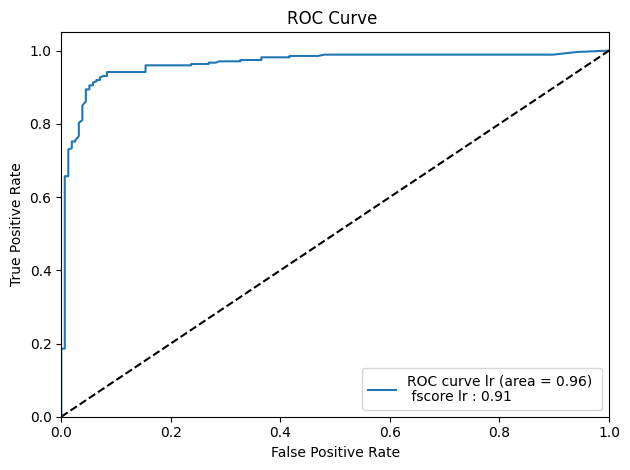

In [18]:
accuracy_model_with_roc( train_data['processed_body'], train_data['label'])

In [24]:
text = input('Enter the text to check if it is spam or not: ')
class_label = model.predict([text])

if class_label[0] == 1:
    print('Spam') 
else:
    print('Not Spam')

Spam
